In [8]:
import os, importlib, sys, time

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import scipy.linalg as la
import scipy.stats as stats
import scipy.optimize as opt

In [11]:
import freqepid

# 1. parameters

In [12]:
T = 60
T0 = 40

In [13]:
GPi = np.load('data/GPi.npz')

## observation parameters

In [14]:
alpha = 0.01
r_Y = 10

$$Y_t = NegBinom( \frac{EY_t}{r_Y + EY_t}, r_Y )$$

$$ EY_t = \alpha\sum_{s=1}^{t-1} I_s \pi_{t-s} $$

## latent parameters

In [15]:
d = 2
beta = np.array([0.5, -2.7])

In [16]:
r_I = 100
K = 6.5

$$I_t = NegBinom( \frac{EI_t}{r_I + EI_t}, r_I )$$

$$ EI_t = R(\bar{A}_t, \beta) \sum_{s=1}^{t-1} I_s g_{t-s} $$

$$R(\bar{A}_t, \beta) = \frac{K}{1+\exp(- \beta^\top A_t)}$$

## seed values

In [17]:
mu = np.log(100)

$$I_{[-T_0,0)} = \exp(\mu_0)$$

# 2. simulation

In [18]:
num_sim = 1000

## load simulation

In [19]:
data = pd.read_feather('data/simulation_randinf_2.feather')

In [20]:
data

,sim,date,R,EI,infection,EY,death,intervention
0,0,0,4.045986,404.595779,441.0,0.956069,1,0
1,0,1,4.045986,429.880919,530.0,0.962544,2,0
2,0,2,4.045986,528.356785,533.0,0.968322,0,0
3,0,3,4.045986,693.167715,715.0,0.973949,3,0
4,0,4,4.045986,906.581202,952.0,0.981001,5,0
...,...,...,...,...,...,...,...,...
59995,999,55,0.648378,402.686550,427.0,17.516285,11,1
59996,999,56,0.648378,379.787070,390.0,16.607593,8,1
59997,999,57,0.648378,358.160166,355.0,15.732875,8,1
59998,999,58,0.648378,338.050643,308.0,14.890695,10,1


# 3. Fit results

In [21]:
result = pd.read_feather('coverage_epidemia_nbinom_randinf_2.feather')

In [22]:
result

,b[0],b[1],"V[0,0]","V[1,0]","V[0,1]","V[1,1]"
0,0.558428,-2.719605,0.033718,-0.040776,-0.040776,0.055862
1,0.461073,-2.682739,0.031771,-0.039498,-0.039498,0.056369
2,0.507302,-2.873351,0.031349,-0.038679,-0.038679,0.056447
3,0.511180,-2.868899,0.031892,-0.038906,-0.038906,0.055847
4,0.713291,-2.912794,0.040287,-0.048116,-0.048116,0.064071
...,...,...,...,...,...,...
995,0.439951,-2.693866,0.029350,-0.036037,-0.036037,0.051529
996,0.350244,-2.451831,0.026882,-0.032943,-0.032943,0.047127
997,0.815402,-3.220963,0.044548,-0.053739,-0.053739,0.076598
998,0.689562,-3.001282,0.038751,-0.046767,-0.046767,0.064727


# 4. Confidence Region coverage test

In [23]:
model = freqepid.Model(GPi['g'], GPi['pi'], alpha, K, T0, 'nbinom')

In [24]:
bepi = np.zeros((num_sim, d))
Ts_epi = np.zeros(num_sim)
ps_epi = np.zeros(num_sim)

In [25]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    bepi[iter_sim] = result.iloc[iter_sim,:2].to_numpy()
    Ts_epi[iter_sim] = (bepi[iter_sim,1]-beta[1])/np.sqrt(result.iloc[iter_sim,-1])
    ps_epi[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_epi[iter_sim])))
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

1-th simulation finished, 0.000898 sec.
2-th simulation finished, 0.009286 sec.
3-th simulation finished, 0.000265 sec.
4-th simulation finished, 0.000136 sec.
5-th simulation finished, 0.000122 sec.
6-th simulation finished, 0.000123 sec.
7-th simulation finished, 0.000105 sec.
8-th simulation finished, 0.000109 sec.
9-th simulation finished, 0.000113 sec.
10-th simulation finished, 0.000108 sec.
11-th simulation finished, 0.000100 sec.
12-th simulation finished, 0.000100 sec.
13-th simulation finished, 0.000099 sec.
14-th simulation finished, 0.000099 sec.
15-th simulation finished, 0.000100 sec.
16-th simulation finished, 0.000100 sec.
17-th simulation finished, 0.000100 sec.
18-th simulation finished, 0.000098 sec.
19-th simulation finished, 0.000099 sec.
20-th simulation finished, 0.000099 sec.
21-th simulation finished, 0.000098 sec.
22-th simulation finished, 0.000167 sec.
23-th simulation finished, 0.000104 sec.
24-th simulation finished, 0.000100 sec.
25-th simulation finished

361-th simulation finished, 0.000214 sec.
362-th simulation finished, 0.000215 sec.
363-th simulation finished, 0.000215 sec.
364-th simulation finished, 0.000214 sec.
365-th simulation finished, 0.000213 sec.
366-th simulation finished, 0.000215 sec.
367-th simulation finished, 0.000215 sec.
368-th simulation finished, 0.000219 sec.
369-th simulation finished, 0.000274 sec.
370-th simulation finished, 0.000279 sec.
371-th simulation finished, 0.000862 sec.
372-th simulation finished, 0.000245 sec.
373-th simulation finished, 0.000234 sec.
374-th simulation finished, 0.000223 sec.
375-th simulation finished, 0.000219 sec.
376-th simulation finished, 0.000218 sec.
377-th simulation finished, 0.000216 sec.
378-th simulation finished, 0.000214 sec.
379-th simulation finished, 0.000214 sec.
380-th simulation finished, 0.000215 sec.
381-th simulation finished, 0.000217 sec.
382-th simulation finished, 0.000222 sec.
383-th simulation finished, 0.000229 sec.
384-th simulation finished, 0.0002

980-th simulation finished, 0.000102 sec.
981-th simulation finished, 0.000103 sec.
982-th simulation finished, 0.000102 sec.
983-th simulation finished, 0.000099 sec.
984-th simulation finished, 0.000101 sec.
985-th simulation finished, 0.000103 sec.
986-th simulation finished, 0.000099 sec.
987-th simulation finished, 0.000102 sec.
988-th simulation finished, 0.000107 sec.
989-th simulation finished, 0.000100 sec.
990-th simulation finished, 0.000103 sec.
991-th simulation finished, 0.000101 sec.
992-th simulation finished, 0.000101 sec.
993-th simulation finished, 0.000102 sec.
994-th simulation finished, 0.000102 sec.
995-th simulation finished, 0.000100 sec.
996-th simulation finished, 0.000105 sec.
997-th simulation finished, 0.000103 sec.
998-th simulation finished, 0.000100 sec.
999-th simulation finished, 0.000105 sec.
1000-th simulation finished, 0.000104 sec.


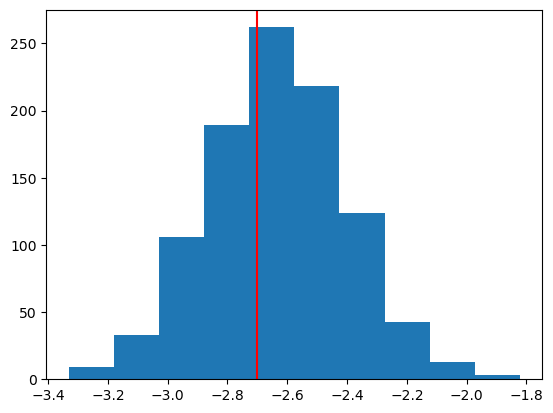

In [26]:
plt.hist(bepi[:,1])
plt.axvline(beta[1], color='red')

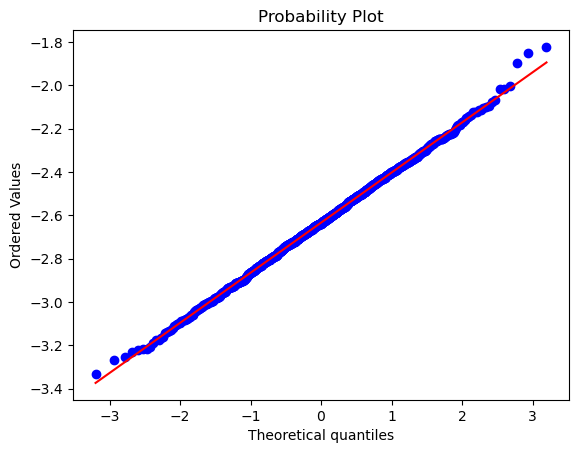

In [27]:
stats.probplot(bepi[:,1], dist = 'norm', plot=plt, fit=True)
# plt.plot([0, 1], [0, 1], color='black')
plt.show()

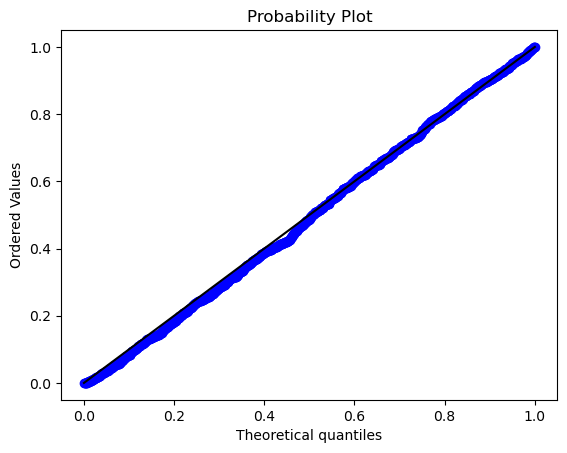

In [28]:
stats.probplot(ps_epi, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [29]:
np.mean(np.abs(ps_epi) > 0.05)

0.936